In [1]:
#packages import
import pandas as pd
import scipy
import numpy as np
import matplotlib
import string

In [2]:
#creating a data frame and visualization of the data
data=pd.read_csv('raw_dataset_CERTandHeLa_SMCerGlcCer.csv')
data.head()

,CP0_ID.BR,CP0_ID.mode.BR,CP0_ID,GENE,BR,Good_bad,CP_plate,batch,Toxic,Series_p2,...,GlcDHCer38:1,GlcDHCer40:0,GlcDHCer40:0-OH,GlcDHCer40:1,GlcDHCer42:0,GlcDHCer42:0-OH,GlcDHCer42:1,GlcDHCer44:0,GlcDHCer44:0-OH,GlcDHCer44:1
0,CP0003_1,CP0003_p2_1_A.2,CP0003,HeLa MZ,BR1,Good,CP001,CP001_BR1,no,1,...,1.66,2.06,2.45,3.38,4.73,4.78,7.88,0.61,0.62,0.8
1,CP0003_1,CP0003_p2_1_A.1,CP0003,HeLa MZ,BR1,Good,CP001,CP001_BR1,no,1,...,0.72,1.63,2.43,2.45,3.88,4.54,6.42,1.47,1.39,1.32
2,CP0003_1,CP0003_p2_1_B.3,CP0003,HeLa MZ,BR1,Good,CP001,CP001_BR1,no,1,...,2.54,1.23,1.25,1.72,2.41,3.39,4.36,0.71,0.88,1.14
3,CP0003_1,CP0003_p2_1_A.3,CP0003,HeLa MZ,BR1,Good,CP001,CP001_BR1,no,1,...,1.93,3.33,2.42,2.19,4.12,3.53,7.12,1.43,1.29,1.41
4,CP0003_1,CP0003_p2_1_B.1,CP0003,HeLa MZ,BR1,Good,CP001,CP001_BR1,no,1,...,1.97,1.41,1.58,2.27,3.64,2.3,6.68,0.69,1.84,0.85


CP0_ID.BR          object
CP0_ID.mode.BR     object
CP0_ID             object
GENE               object
BR                 object
                    ...  
GlcDHCer42:0-OH    object
GlcDHCer42:1       object
GlcDHCer44:0       object
GlcDHCer44:0-OH    object
GlcDHCer44:1       object
Length: 205, dtype: object

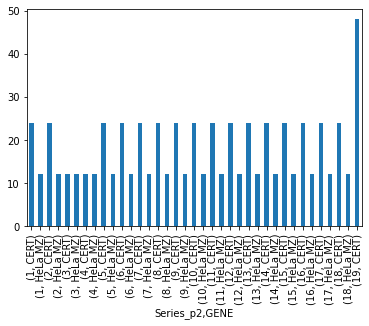

In [3]:
#Plot to see amount of measures in each series for each gene 
data.groupby(['Series_p2','GENE'])['GENE'].count().plot.bar()
data.dtypes

In [4]:
#Filtering all the same lipids in one column / grouped by the name of lipids
filter_col_SM = [col for col in data if col.startswith('SM')]
filter_col_GlcCer = [col for col in data if col.startswith('GlcCer')]
filter_col_GlcDHCer = [col for col in data if col.startswith('GlcDHCer')]
filter_col_Cer = [col for col in data if col.startswith('Cer')]
filter_col_DHCer = [col for col in data if col.startswith('DHCer')]

lipids=filter_col_SM+filter_col_GlcCer+filter_col_DHCer+filter_col_Cer+filter_col_GlcDHCer

In [5]:
#visualization of the clean data without the other columns
data[['GENE','Series_p2']+lipids].tail(30)

,GENE,Series_p2,SM28:0,SM28:1,SM28:2,SM30:0,SM30:0-OH,SM30:1-OH,SM30:2,SM30:2-OH,...,GlcDHCer38:1,GlcDHCer40:0,GlcDHCer40:0-OH,GlcDHCer40:1,GlcDHCer42:0,GlcDHCer42:0-OH,GlcDHCer42:1,GlcDHCer44:0,GlcDHCer44:0-OH,GlcDHCer44:1
642,CERT,19,3.67,25.18,2.11,1482.75,2.52,25.32,16.25,?,...,1.17,2.9,2.66,0.99,4.77,7.78,6.95,1.26,2.04,1.17
643,CERT,19,4.65,25.96,2.08,1235.6,3.55,18.87,12.66,2.26,...,1.91,3.71,3.91,2.44,6.84,6.59,6.83,1.07,2,1.08
644,CERT,19,3.49,22.52,1.82,1405.75,2.59,25.03,11.09,1.14,...,1.27,2.96,2.63,1.62,5.59,7.84,6.55,3.45,2.04,1.36
645,CERT,19,4.69,23.56,2.17,1318.21,3.38,23.46,11.66,1.14,...,1.5,3.14,2.71,0.91,5.95,5.33,5.59,1.08,1.95,1.17
646,CERT,19,5.1,21.29,2.96,1438.73,2.04,24.64,11.71,1.29,...,2.44,3.68,4.29,2.43,4.6,11.07,8.1,1.97,2.32,1.67
647,CERT,19,5.87,19.9,1.64,1376.4,2.56,21.94,10.25,1.24,...,2.11,3.95,3.55,2.56,6.8,9.5,5.87,1.98,1.9,1.4
648,CERT,19,3.47,23.96,1.15,1456.1,2.91,21.82,9.74,0.81,...,1.12,3.38,3.6,1.53,4.6,7.81,6.74,1.58,1.92,1.72
649,CERT,19,8.31,43.54,2.68,1114.32,4.86,121.47,?,1.78,...,1.97,2.95,4.71,3.57,?,7.66,7.19,?,?,?
650,CERT,19,?,?,?,?,?,?,?,?,...,?,?,?,?,?,?,?,?,?,?
651,CERT,19,3.94,23.78,1.44,1208.39,2.85,20.78,9.15,?,...,1.19,3.03,3.37,2.52,5.77,9.36,7.17,1.67,2.11,0.56


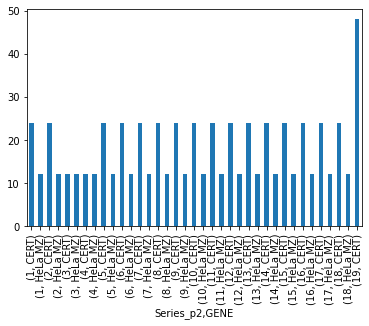

In [6]:
data.groupby(['Series_p2','GENE'])['GENE'].count().plot.bar()

In [7]:
#Transforming the lipids group from object to number to Sum up.
data[lipids] = data[lipids].apply(pd.to_numeric, errors='coerce')
data.dtypes

CP0_ID.BR           object
CP0_ID.mode.BR      object
CP0_ID              object
GENE                object
BR                  object
                    ...   
GlcDHCer42:0-OH    float64
GlcDHCer42:1       float64
GlcDHCer44:0       float64
GlcDHCer44:0-OH    float64
GlcDHCer44:1       float64
Length: 205, dtype: object

In [8]:
#Sum up all the all the
data['SM_Sum'] = data[filter_col_SM].sum(axis=1)
data['GlcCer_Sum'] = data[filter_col_GlcCer].sum(axis=1)
data['DHCer_Sum'] = data[filter_col_DHCer].sum(axis=1)
data['Cer_Sum'] = data[filter_col_Cer].sum(axis=1)
data['GlcDHCer_Sum'] = data[filter_col_GlcDHCer].sum(axis=1)

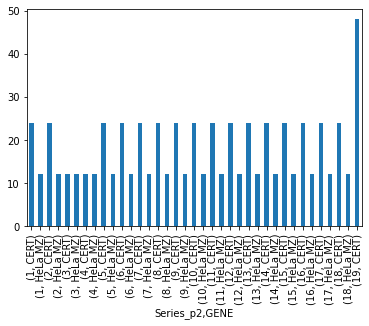

In [9]:
#Checking if we didnt loose any  any row in the apply function
data.groupby(['Series_p2','GENE'])['GENE'].count().plot.bar()

In [10]:
#Select the columns of interes and earease the rest
features = ['GENE', 'Series_p2', 'SM_Sum', 'GlcCer_Sum', 'DHCer_Sum', 'Cer_Sum', 'GlcDHCer_Sum']
data = data[features]

In [11]:
pd.set_option('display.max_rows', 800)
data

,GENE,Series_p2,SM_Sum,GlcCer_Sum,DHCer_Sum,Cer_Sum,GlcDHCer_Sum
0,HeLa MZ,1,43536.12,900.58,1186.76,20066.99,165.17
1,HeLa MZ,1,41313.79,867.90,916.82,18184.47,160.13
2,HeLa MZ,1,39366.58,701.63,1728.21,21854.84,137.38
3,HeLa MZ,1,40306.17,882.52,1304.80,20301.13,162.60
4,HeLa MZ,1,36961.95,676.51,2004.08,25895.79,130.07
5,HeLa MZ,1,39606.50,747.94,1796.73,24735.68,123.08
6,HeLa MZ,2,28525.97,422.41,1693.20,19099.22,115.82
7,HeLa MZ,2,39965.83,768.24,1837.15,26038.31,212.68
8,HeLa MZ,2,70185.41,1216.67,2031.53,18456.53,144.59
9,HeLa MZ,2,33979.59,588.60,997.14,12947.73,193.10


In [12]:
#Transforming the lipids from number to string to eliminate "0.0"
data['SM_Sum']=data['SM_Sum'].astype(str)
data['GlcCer_Sum']=data['GlcCer_Sum'].astype(str)
data['DHCer_Sum']=data['DHCer_Sum'].astype(str)
data['Cer_Sum']=data['Cer_Sum'].astype(str)
data['GlcDHCer_Sum'] = data['GlcDHCer_Sum'].astype(str)

data.dtypes
data

,GENE,Series_p2,SM_Sum,GlcCer_Sum,DHCer_Sum,Cer_Sum,GlcDHCer_Sum
0,HeLa MZ,1,43536.12000000001,900.58,1186.76,20066.989999999998,165.17000000000002
1,HeLa MZ,1,41313.79,867.9,916.82,18184.469999999998,160.13
2,HeLa MZ,1,39366.579999999994,701.6299999999999,1728.21,21854.840000000004,137.37999999999997
3,HeLa MZ,1,40306.16999999999,882.52,1304.8,20301.129999999997,162.59999999999997
4,HeLa MZ,1,36961.94999999999,676.5100000000001,2004.08,25895.789999999997,130.07
5,HeLa MZ,1,39606.50000000001,747.9399999999999,1796.73,24735.68,123.08
6,HeLa MZ,2,28525.969999999998,422.40999999999997,1693.1999999999998,19099.22,115.82000000000001
7,HeLa MZ,2,39965.83,768.2399999999999,1837.15,26038.31,212.68
8,HeLa MZ,2,70185.41,1216.67,2031.5299999999997,18456.530000000002,144.59
9,HeLa MZ,2,33979.59000000001,588.6,997.14,12947.730000000001,193.10000000000002


In [13]:
#Elimination of the "0.0"
data=data[~data['SM_Sum'].str.contains("0.0")]
data=data[~data['GlcCer_Sum'].str.contains("0.0")]
data=data[~data['DHCer_Sum'].str.contains("0.0")]
data=data[~data['Cer_Sum'].str.contains("0.0")]
data=data[~data['GlcDHCer_Sum'].str.contains("0.0")]

data.reset_index()

,index,GENE,Series_p2,SM_Sum,GlcCer_Sum,DHCer_Sum,Cer_Sum,GlcDHCer_Sum
0,1,HeLa MZ,1,41313.79,867.9,916.82,18184.469999999998,160.13
1,7,HeLa MZ,2,39965.83,768.2399999999999,1837.15,26038.31,212.68
2,10,HeLa MZ,2,24076.44,676.21,872.11,12268.329999999998,152.32999999999998
3,14,CERT,1,28289.819999999996,1501.2599999999998,2591.39,31242.75,244.28999999999996
4,15,CERT,1,27126.86,1463.77,1627.89,23302.999999999996,247.72
5,22,CERT,2,18676.53,614.63,9004.189999999999,33854.479999999996,191.85
6,28,CERT,1,19330.73,1538.29,1357.03,27262.84,281.78
7,29,CERT,1,20581.89,885.9499999999999,2888.54,30235.99,180.36999999999998
8,37,HeLa MZ,1,42282.39,609.9699999999999,1043.66,16442.48,114.56
9,38,HeLa MZ,1,33570.78,526.9599999999999,1058.93,17046.95,122.2


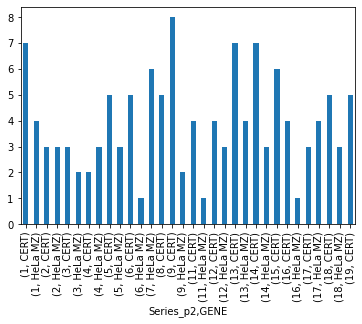

In [14]:
#Checking the rows lost in the str.constrains function
data.groupby(['Series_p2','GENE'])['GENE'].count().plot.bar()

In [15]:
#Retransformation of the lipids to number to calculate mean, sd...
data['SM_Sum']=data['SM_Sum'].astype(float)
data['GlcCer_Sum']=data['GlcCer_Sum'].astype(float)
data['DHCer_Sum']=data['DHCer_Sum'].astype(float)
data['Cer_Sum']=data['Cer_Sum'].astype(float)
data['GlcDHCer_Sum'] = data['GlcDHCer_Sum'].astype(float)

data.dtypes

GENE             object
Series_p2         int64
SM_Sum          float64
GlcCer_Sum      float64
DHCer_Sum       float64
Cer_Sum         float64
GlcDHCer_Sum    float64
dtype: object

In [16]:
data

,GENE,Series_p2,SM_Sum,GlcCer_Sum,DHCer_Sum,Cer_Sum,GlcDHCer_Sum
1,HeLa MZ,1,41313.79,867.90,916.82,18184.47,160.13
7,HeLa MZ,2,39965.83,768.24,1837.15,26038.31,212.68
10,HeLa MZ,2,24076.44,676.21,872.11,12268.33,152.33
14,CERT,1,28289.82,1501.26,2591.39,31242.75,244.29
15,CERT,1,27126.86,1463.77,1627.89,23303.00,247.72
22,CERT,2,18676.53,614.63,9004.19,33854.48,191.85
28,CERT,1,19330.73,1538.29,1357.03,27262.84,281.78
29,CERT,1,20581.89,885.95,2888.54,30235.99,180.37
37,HeLa MZ,1,42282.39,609.97,1043.66,16442.48,114.56
38,HeLa MZ,1,33570.78,526.96,1058.93,17046.95,122.20


In [17]:
#Calculation of the mean
mean_d=data.groupby(['GENE','Series_p2']).mean().round(2).reset_index()
mean_d

,GENE,Series_p2,SM_Sum,GlcCer_Sum,DHCer_Sum,Cer_Sum,GlcDHCer_Sum
0,CERT,1,21518.30,1110.36,2243.00,25139.42,202.95
1,CERT,2,18238.64,656.54,4127.19,28167.89,216.71
2,CERT,3,15465.58,475.34,1116.28,14111.41,121.99
3,CERT,4,140883.51,690.07,553.70,12450.82,382.77
4,CERT,5,21991.19,1195.66,793.56,15390.21,173.48
5,CERT,6,15462.50,1019.97,1346.35,18576.34,134.22
6,CERT,8,13375.09,764.46,499.06,18362.93,94.48
7,CERT,9,15115.55,1017.80,2009.95,32764.34,273.75
8,CERT,11,15947.18,1158.70,848.78,13864.88,188.30
9,CERT,12,21484.46,1419.00,1036.96,20966.77,358.03


In [18]:
#Calculate of the std
std_d=data.groupby(['GENE','Series_p2']).std().round(2).reset_index()
std_d

,GENE,Series_p2,SM_Sum,GlcCer_Sum,DHCer_Sum,Cer_Sum,GlcDHCer_Sum
0,CERT,1,5782.26,390.54,771.64,6086.90,53.70
1,CERT,2,3228.49,234.80,4241.95,5152.96,38.54
2,CERT,3,2504.04,99.82,545.91,3949.30,19.29
3,CERT,4,32270.18,542.08,115.65,642.37,207.27
4,CERT,5,3389.38,348.00,456.27,2863.26,29.27
5,CERT,6,5604.32,428.41,393.78,5007.81,60.22
6,CERT,8,5283.50,468.93,215.93,14241.62,47.92
7,CERT,9,5615.10,425.90,892.06,9192.80,85.70
8,CERT,11,1679.40,233.21,129.20,987.67,32.81
9,CERT,12,6050.38,193.12,123.36,2020.05,122.45


In [19]:
var_d=data.groupby(['GENE','Series_p2']).var().round(2).reset_index()
var=std_d.iloc[:,2:7]/mean_d.iloc[:,2:7]
var[['GENE','Series']]=std_d.iloc[:,0:2]
var

,SM_Sum,GlcCer_Sum,DHCer_Sum,Cer_Sum,GlcDHCer_Sum,GENE,Series
0,0.268714,0.351724,0.344021,0.242126,0.264597,CERT,1
1,0.177014,0.357632,1.027806,0.182937,0.177841,CERT,2
2,0.161911,0.209997,0.489044,0.279866,0.158128,CERT,3
3,0.229056,0.785543,0.208868,0.051593,0.541500,CERT,4
4,0.154124,0.291053,0.574966,0.186044,0.168723,CERT,5
5,0.362446,0.420022,0.292480,0.269580,0.448666,CERT,6
6,0.395025,0.613413,0.432673,0.775564,0.507197,CERT,8
7,0.371478,0.418452,0.443822,0.280573,0.313059,CERT,9
8,0.105310,0.201269,0.152218,0.071235,0.174243,CERT,11
9,0.281617,0.136096,0.118963,0.096345,0.342010,CERT,12


CERT            AxesSubplot(0.1,0.15;0.363636x0.75)
HeLa MZ    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

<Figure size 800x600 with 0 Axes>

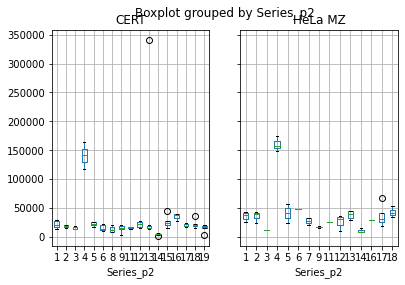

In [20]:
#Boxplot of the data Sphingomyelin
from matplotlib.pyplot import figure
figure( figsize=(8, 6), dpi=100)
data.groupby(['GENE']).boxplot(column='SM_Sum', by='Series_p2')

CERT            AxesSubplot(0.1,0.15;0.363636x0.75)
HeLa MZ    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

<Figure size 800x600 with 0 Axes>

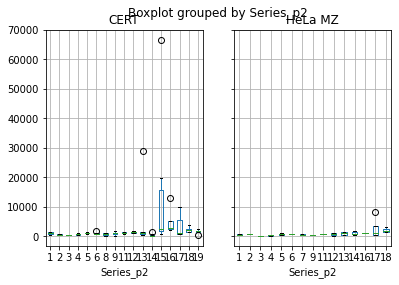

In [21]:
#Boxplot of the data GlcCer
from matplotlib.pyplot import figure
figure( figsize=(8, 6), dpi=100)
data.groupby(['GENE']).boxplot(column='GlcCer_Sum', by='Series_p2')

CERT            AxesSubplot(0.1,0.15;0.363636x0.75)
HeLa MZ    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

<Figure size 800x600 with 0 Axes>

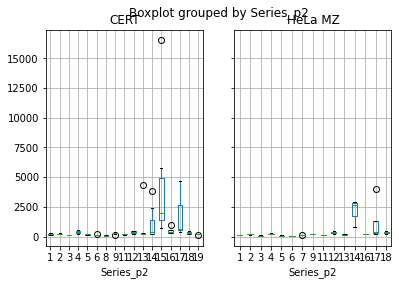

In [22]:
#Boxplot of the data DH Glc Cer
from matplotlib.pyplot import figure
figure( figsize=(8, 6), dpi=100)
data.groupby(['GENE']).boxplot(column='GlcDHCer_Sum', by='Series_p2')

CERT            AxesSubplot(0.1,0.15;0.363636x0.75)
HeLa MZ    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

<Figure size 800x600 with 0 Axes>

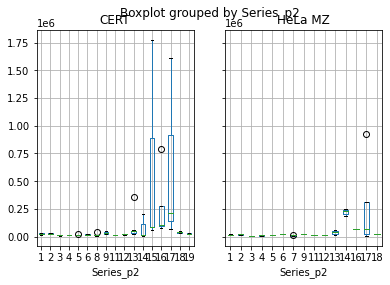

In [23]:
#Boxplot of the data Cer
from matplotlib.pyplot import figure
figure( figsize=(8, 6), dpi=100)
data.groupby(['GENE']).boxplot(column='Cer_Sum', by='Series_p2')

CERT            AxesSubplot(0.1,0.15;0.363636x0.75)
HeLa MZ    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

<Figure size 800x600 with 0 Axes>

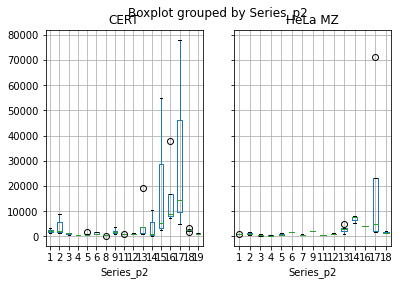

In [24]:
#Boxplot of the data DH Cer
from matplotlib.pyplot import figure
figure( figsize=(8, 6), dpi=100)
data.groupby(['GENE']).boxplot(column='DHCer_Sum', by='Series_p2')